In [2]:
import tensorflow as tf
import numpy as np

In [6]:
c= tf.constant([1,2,3])

In [4]:
type(c)

tensorflow.python.framework.ops.Tensor

In [8]:
g= tf.get_default_graph()

In [9]:
g.as_graph_def() #查看graph里的节点们

node {
  name: "Const"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
          dim {
            size: 3
          }
        }
        tensor_content: "\001\000\000\000\002\000\000\000\003\000\000\000"
      }
    }
  }
}
node {
  name: "Const_1"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
          dim {
            size: 3
          }
        }
        tensor_content: "\001\000\000\000\002\000\000\000\003\000\000\000"
      }
    }
  }
}
versions {
  producer: 21
}

In [10]:
with tf.Session() as sess:
    r=sess.run(c)
    print(type(r))
    print(r)

<type 'numpy.ndarray'>
[1 2 3]


In [11]:
c2= c+c

In [12]:
g.as_graph_def()

node {
  name: "Const"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
          dim {
            size: 3
          }
        }
        tensor_content: "\001\000\000\000\002\000\000\000\003\000\000\000"
      }
    }
  }
}
node {
  name: "Const_1"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
          dim {
            size: 3
          }
        }
        tensor_content: "\001\000\000\000\002\000\000\000\003\000\000\000"
      }
    }
  }
}
node {
  name: "add"
  op: "Add"
  input: "Const_1"
  input: "Const_1"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
versions {
  producer: 21
}

In [13]:
with tf.Session() as sess:
    print(sess.run(c2))

[2 4 6]


In [14]:
with tf.Session() as sess:
    r= tf.random_uniform([1],-1.0,1.0)
    print(sess.run(r))

[-0.01696086]


In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

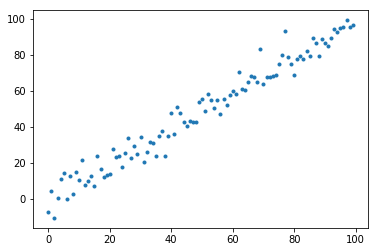

In [6]:
x= np.arange(100)
y = x+ np.random.normal(scale=5, size=100)
plt.plot(x,y,'.')

In [8]:
tf.reset_default_graph()
x_place= tf.placeholder('float')
y_place= tf.placeholder('float')
w= tf.Variable(tf.random_uniform([1],-1.0,1.0), name='w')
b= tf.Variable(tf.zeros([1]), name='b')
y_bar=w*x_place+b
cost=tf.reduce_mean(tf.square(y_bar-y_place))
train_step=tf.train.GradientDescentOptimizer(0.0001).minimize(cost)

In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        feed_dict={x_place:x.astype(float), y_place: y.astype(float)}
        sess.run(train_step, feed_dict= feed_dict)
        print(sess.run(cost, feed_dict= feed_dict))
        print sess.run([w,b])

1417.94
[array([ 0.33243752], dtype=float32), array([ 0.01872874], dtype=float32)]
193.643
[array([ 0.75935733], dtype=float32), array([ 0.02513698], dtype=float32)]
49.4796
[array([ 0.90585548], dtype=float32), array([ 0.02731744], dtype=float32)]
32.504
[array([ 0.95612675], dtype=float32), array([ 0.02804713], dtype=float32)]
30.505
[array([ 0.97337765], dtype=float32), array([ 0.02827898], dtype=float32)]
30.2696
[array([ 0.97929758], dtype=float32), array([ 0.02834001], dtype=float32)]
30.2419
[array([ 0.98132926], dtype=float32), array([ 0.02834241], dtype=float32)]
30.2387
[array([ 0.98202676], dtype=float32), array([ 0.0283247], dtype=float32)]
30.2383
[array([ 0.98226637], dtype=float32), array([ 0.02830009], dtype=float32)]
30.2382
[array([ 0.98234886], dtype=float32), array([ 0.02827312], dtype=float32)]
30.2382
[array([ 0.98237747], dtype=float32), array([ 0.02824533], dtype=float32)]
30.2382
[array([ 0.98238754], dtype=float32), array([ 0.02821726], dtype=float32)]
30.2382